<a href="https://colab.research.google.com/github/maneeshdisodia/DearML/blob/master/keras_chrun_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Complete-Deep-Learning/master/ANN/Churn_Modelling.csv')

In [5]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
X =dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [7]:
geography =pd.get_dummies(X.Geography,drop_first = True)
gender =pd.get_dummies(X.Gender,drop_first = True)

In [8]:
X =pd.concat([X,geography,gender],axis =1)

In [9]:
X.drop(['Geography','Gender'],axis =1, inplace =True)

In [10]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split   

In [12]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.2,random_state =101)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()

In [15]:
X_train =sc.fit_transform(X_train)

In [16]:
X_test = sc.fit_transform(X_test)

In [17]:
import  tensorflow.keras as keras

In [18]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU

In [19]:
from keras.layers import Dropout

In [20]:
classifier = Sequential()

In [24]:
classifier.add(Dense(units =6,kernel_initializer = "he_uniform",activation='relu',input_dim =11))

In [25]:
classifier.add(Dense(units =6,kernel_initializer = "he_uniform",activation='relu'))
classifier.add(Dense(units =1,kernel_initializer = "glorot_uniform",activation='sigmoid'))

In [26]:
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [27]:
model_history = classifier.fit(X_train,y_train,validation_split =0.3,batch_size = 10,epochs=100)

Epoch 1/100
560/560 [==============================] - 16s 3ms/step - loss: 0.6052 - accuracy: 0.7334 - val_loss: 0.4894 - val_accuracy: 0.8008
Epoch 2/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4904 - accuracy: 0.7919 - val_loss: 0.4612 - val_accuracy: 0.8008
Epoch 3/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4523 - accuracy: 0.8082 - val_loss: 0.4505 - val_accuracy: 0.8008
Epoch 4/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4543 - accuracy: 0.7965 - val_loss: 0.4378 - val_accuracy: 0.8025
Epoch 5/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4407 - accuracy: 0.8018 - val_loss: 0.4324 - val_accuracy: 0.8021
Epoch 6/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4215 - accuracy: 0.8121 - val_loss: 0.4303 - val_accuracy: 0.8008
Epoch 7/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4343 - accuracy: 0.8055 - val_loss: 0.4271 - val_accuracy: 0.804

In [32]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

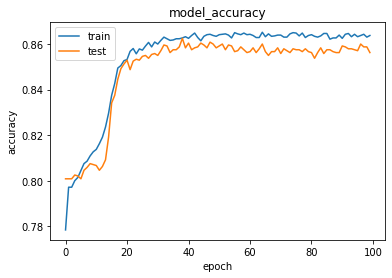

In [35]:
plt.plot( model_history.history['accuracy'])
plt.plot( model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [40]:
y_pred = classifier.predict(X_test)

In [41]:
y_pred = (y_pred >0.5)

In [42]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [45]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1577
           1       0.76      0.51      0.61       423

    accuracy                           0.86      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

